In [77]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [78]:
# Quandl API Key
quandl.ApiConfig.api_key = 'sEBpFfZEFkq3_yihhY8r'
# Setting the dataframe to WIKI Servic and Apple stock prices
df = quandl.get("WIKI/GOOGL")
df.head()    # Present first 5 entries

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [80]:
# Set dataframe to only 'Adj. Close' to factor in inflation and share split
df = df[['Adj. Close']]
df

,Adj. Close
Date,
2004-08-19,50.322842
2004-08-20,54.322689
2004-08-23,54.869377
2004-08-24,52.597363
2004-08-25,53.164113
...,...
2018-03-21,1094.000000
2018-03-22,1053.150000
2018-03-23,1026.550000


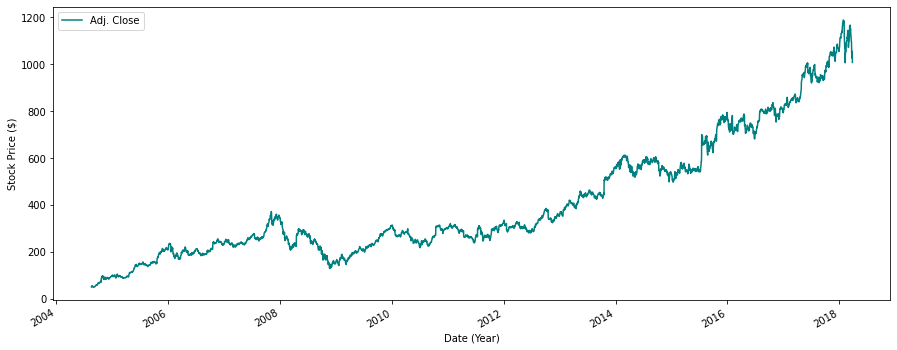

In [81]:
# Plot the data as a line graph
df.plot(figsize = (15, 6), color = "teal")
plt.ylabel('Stock Price ($)')
plt.xlabel('Date (Year)')
plt.show()

In [82]:
forecast = 30    # The last 30 days do not have corresponding data
df['Prediction'] = df[['Adj. Close']].shift(-forecast)
df

,Adj. Close,Prediction
Date,,
2004-08-19,50.322842,66.495265
2004-08-20,54.322689,67.739104
2004-08-23,54.869377,69.399229
2004-08-24,52.597363,68.752232
2004-08-25,53.164113,69.639972
...,...,...
2018-03-21,1094.000000,NaN
2018-03-22,1053.150000,NaN
2018-03-23,1026.550000,NaN


In [83]:
# Drop 'Prediction' column, but not index, for previous to 30 days
X = np.array(df.drop(['Prediction'], 1))
# Allow for standardization of data, sets mean and standard deviation to 0 of above array
X = preprocessing.scale(X)
# Splitting data further
X_forecast = X[-forecast:]    # The last 30 days without any corresponding y values 
X = X[:-forecast]    # All other data that has corresponding y values
# Setting y data
y = np.array(df['Prediction'])
y = y[:-forecast]    # Both X and y have same length

In [84]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Initialize linear regression model
classifier = LinearRegression()
classifier.fit(X_train, y_train)

# Calculate score (confidence) for linear regression
confidence = classifier.score(X_test, y_test)

forecast_predicted = classifier.predict(X_forecast)
print(forecast_predicted)

[1073.86204161 1092.71747086 1111.67449187 1115.88039042 1124.09916319
 1134.42088524 1130.50960277 1148.98914254 1164.84761509 1138.24073513
 1124.43441597 1091.40693725 1104.33956734 1115.12861145 1121.36634505
 1135.73141884 1150.29967614 1182.26044146 1187.43146166 1160.99728768
 1170.12022704 1171.86760519 1155.41990047 1120.5231335  1116.18516567
 1114.35651413 1072.85628326 1045.83287711 1073.81124573 1025.91073446]


(16801.0, 17896.9)

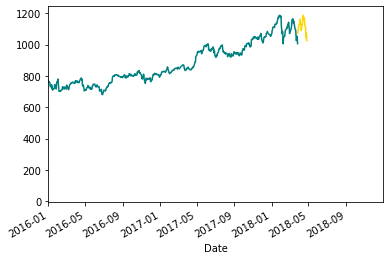

In [85]:
# Create dates array and plot
dates = pd.date_range(start = "2018-03-28", end = "2018-04-26")
plt.plot(dates, forecast_predicted, color = 'gold')
df['Adj. Close'].plot(color = 'teal')
plt.xlim(xmin = datetime.date(2016, 1, 1))